In [1]:
%matplotlib inline

In [97]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.colors as colors


In [61]:
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator 
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
plot_colors={'Base (ASGM = ON)':'b','Base (ASGM = OFF)':'#329932','Observations':'#ff6961'}
np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy


In [3]:
import os
os.chdir('/home/tzd/Hg_dataset_practice/Analysis_of_ASGM_Emissions_in_Peru')

In [4]:
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our custom colormap

matplotlib.colors.ListedColormap

In [5]:
#%% Load ASGM emission data
fn1 = '/net/fs03/d1/angot/postdoc/GMA_2018/emissions_inventory/GMA_emissions_ASGM_Hg0.0.25x0.25.2015.nc'
ds1 = xr.open_dataset(fn1)
#Other inventories
#EDGAR
fn2 = '/net/fs03/d0/arifein/emissions/v2020-07/EDGAR/2010/EDGAR_gold_A_2010_Hg.nc'
ds2 = xr.open_dataset(fn2)

#STREETS
fn3 = '/net/fs03/d0/arifein/emissions/v2020-07/Streets/Streets2019_Hg.nc'
ds3 = xr.open_dataset(fn3)

## load Regridded GMA 18 Emissions

In [6]:
#%% Load ASGM emission data
fn1 = '/net/fs03/d1/tzd/RAworkflow/emissions/output_file.nc'
ds1 = xr.open_dataset(fn1)


## load variables

In [71]:
lat_GMA = ds1.lat
lon_GMA = ds1.lon
Hg0_emiss_ASGM_GMA = ds1.emi_hg_0

lat_EDGAR = ds2.lat
lon_EDGAR = ds2.lon
Hg0_emiss_ASGM_EDGAR = ds2.emi_hg_g

lat_STREETS = ds3.lat
lon_STREETS = ds3.lon
Hg0_emiss_STREETS = ds3.Hg0.isel(time=15)

In [72]:
Hg0_emiss_ASGM_GMA
HG0_emit_copy = Hg0_emiss_ASGM_GMA.copy(deep=True)#make coppy of dataset
HG0_emit_copy 

<xarray.DataArray 'emi_hg_0' (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5
Attributes:
    units:    kg m-2 s-1

## load grid box areas

In [110]:
#fn_g1 = '/net/fs03/d0/arifein/gbox_areas/GMA_025_025_gboxarea.nc'
fn_g1 = '/net/fs03/d0/arifein/gbox_areas/GEOSChem_2x25_gboxarea.nc'
fn_g2 = '/net/fs03/d0/arifein/gbox_areas/EDGAR_gboxarea.nc'
fn_g3 = '/net/fs03/d0/arifein/gbox_areas/Streets_gboxarea.nc'

ds_g1 = xr.open_dataset(fn_g1)
ds_g2 = xr.open_dataset(fn_g2)
ds_g3 = xr.open_dataset(fn_g3)

gbox_GMA = ds_g1.cell_area
gbox_EDGAR = ds_g2.cell_area
gbox_STREETS = ds_g3.cell_area

## Convert units to kg yr^-1

In [111]:
s_in_yr = 3.154e7 # seconds in a year
unit_conv = s_in_yr

Hg0_emiss_ASGM_GMA = Hg0_emiss_ASGM_GMA * unit_conv * gbox_GMA
Hg0_emiss_ASGM_EDGAR = Hg0_emiss_ASGM_EDGAR * unit_conv * gbox_EDGAR
Hg0_emiss_STREETS = Hg0_emiss_STREETS * unit_conv * gbox_STREETS


## Load shapefile for Peru

In [112]:
sf_nm = "/net/fs03/d0/arifein/shapefiles/gadm36_PER_shp/gadm36_PER_0.shp"
peru_sf = gpd.read_file(sf_nm)

In [113]:
#Departments withASGM in Peru
sf_all= "/net/fs03/d0/arifein/shapefiles/gadm36_PER_shp/gadm36_PER_1.shp"
peru_all = gpd.read_file(sf_all)

asgm_list = ['Puno','Ayacucho','Cusco','Arequipa','Madre de Dios','Apurímac']
peru_asgm = peru_all.loc[peru_all['NAME_1'].isin(asgm_list)]
Aqp = peru_all.loc[peru_all['NAME_1'].isin(['Arequipa'])]
Mdd = peru_all.loc[peru_all['NAME_1'].isin(['Madre de Dios'])]
Pun = peru_all.loc[peru_all['NAME_1'].isin(['Puno'])]
Cus = peru_all.loc[peru_all['NAME_1'].isin(['Cusco'])]
Ayco = peru_all.loc[peru_all['NAME_1'].isin(['Ayacucho'])]
Aprc = peru_all.loc[peru_all['NAME_1'].isin(['Apurímac'])]
#peru_asgm

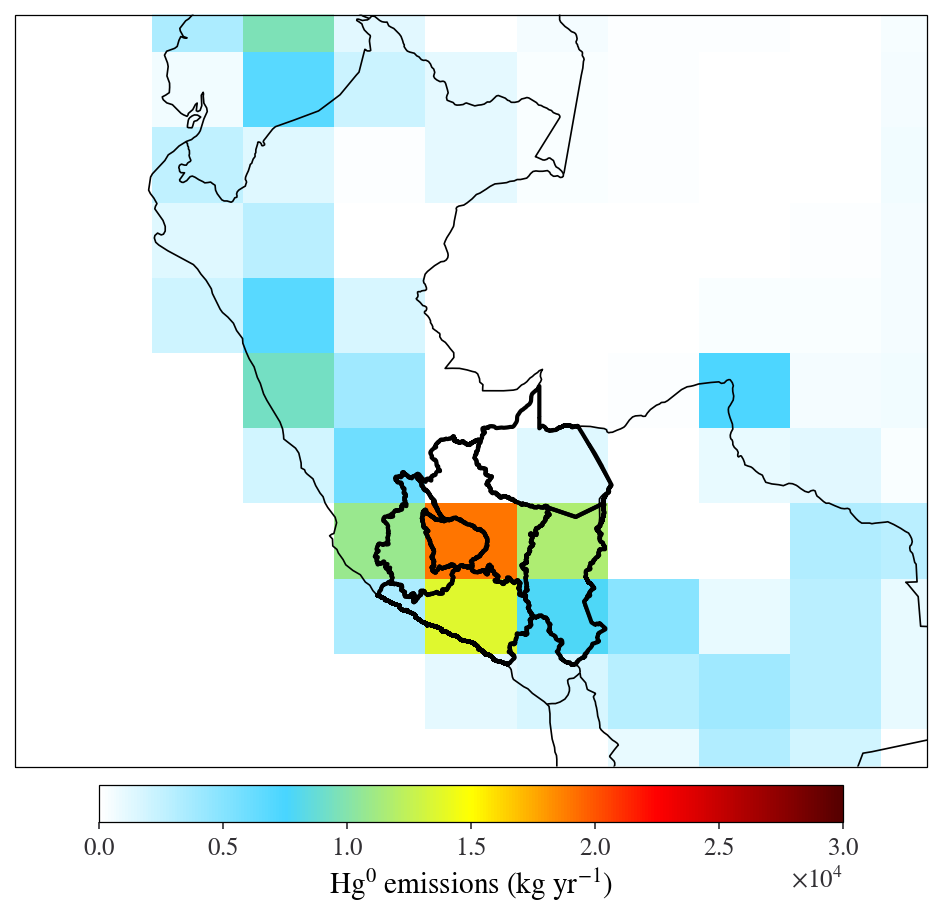

In [117]:
f, axes = plt.subplots(1, 1, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()))
#axes = axes.flatten()
                       

h = axes.pcolormesh(lon_GMA, lat_GMA, Hg0_emiss_ASGM_GMA,cmap=WhGrYlRd,vmin=0, vmax=30000,rasterized = True)
Aqp.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Mdd.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Pun.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Ayco.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Cus.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Aprc.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
#axes.set_title('2015 AMAP/UNEP ASGM inventory', fontsize = 16, fontweight='bold'); #title
axes.set_xlim([-85, -60])
axes.set_ylim([-20, 0])
axes.add_feature(cf.BORDERS)
axes.coastlines()
cbar = f.colorbar(h,orientation='horizontal',ax=axes,shrink=0.4,pad=0.02)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)
name='GMA2018inventory2x25'    
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/Peru_Maps/'+name+'.eps'
f.savefig(savepath)

## Map plot

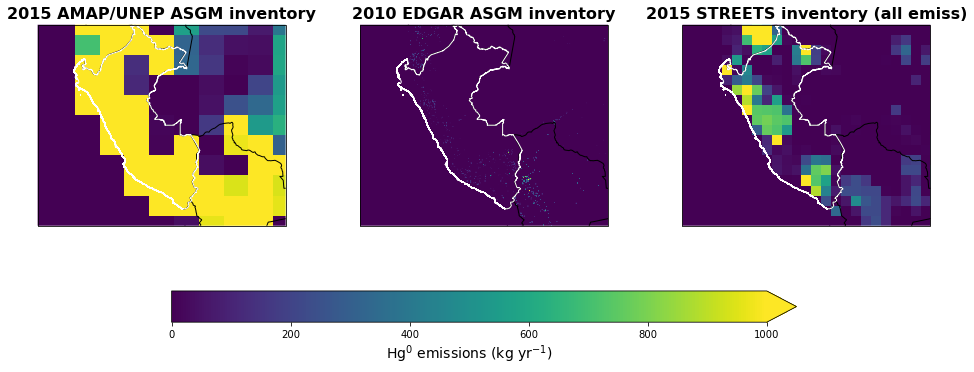

In [14]:
#2015 AMAP/UNEP
f, axes = plt.subplots(1, 3, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
axes = axes.flatten()
                       
axes[0].coastlines()
h = axes[0].pcolormesh(lon_GMA, lat_GMA, Hg0_emiss_ASGM_GMA, vmin=0, vmax=1000, rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes[0], edgecolor='w',linewidth = 1)
axes[0].set_title('2015 AMAP/UNEP ASGM inventory', fontsize = 16, fontweight='bold'); #title
axes[0].set_xlim([-85, -60])
axes[0].set_ylim([-20, 0])
axes[0].add_feature(cf.BORDERS)

axes[1].coastlines()
axes[1].pcolormesh(lon_EDGAR, lat_EDGAR, Hg0_emiss_ASGM_EDGAR, vmin=0, vmax=1000, rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes[1], edgecolor='w',linewidth = 1)
axes[1].set_title('2010 EDGAR ASGM inventory', fontsize = 16, fontweight='bold'); #title
axes[1].set_xlim([-85, -60])
axes[1].set_ylim([-20, 0])
axes[1].add_feature(cf.BORDERS)


axes[2].coastlines()
axes[2].pcolormesh(lon_STREETS, lat_STREETS, Hg0_emiss_STREETS, vmin=0, vmax=1000, rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes[2], edgecolor='w',linewidth = 1)
axes[2].set_title('2015 STREETS inventory (all emiss)', fontsize = 16, fontweight='bold'); #title
axes[2].set_xlim([-85, -60])
axes[2].set_ylim([-20, 0])
axes[2].add_feature(cf.BORDERS)

#f.tight_layout()
cbar = f.colorbar(h, extend='max',orientation='horizontal',ax=axes.ravel().tolist(), shrink=0.7)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)

#plt.savefig('Figures/temp.pdf',bbox_inches = 'tight')

In [15]:
peru_sf

,GID_0,NAME_0,geometry
0,PER,Peru,"MULTIPOLYGON (((-71.38486 -17.70930, -71.38486..."


In [70]:
sf_all= "/net/fs03/d0/arifein/shapefiles/gadm36_PER_shp/gadm36_PER_1.shp"
peru_all = gpd.read_file(sf_all)
# peru_all

In [17]:
#Departments withASGM in Peru
asgm_list = ['Puno','Ayacucho','Cusco','Arequipa','Madre de Dios','Apurímac']
peru_asgm = peru_all.loc[peru_all['NAME_1'].isin(asgm_list)]
Aqp = peru_all.loc[peru_all['NAME_1'].isin(['Arequipa'])]
Mdd = peru_all.loc[peru_all['NAME_1'].isin(['Madre de Dios'])]
Pun = peru_all.loc[peru_all['NAME_1'].isin(['Puno'])]
Cus = peru_all.loc[peru_all['NAME_1'].isin(['Cusco'])]
Ayco = peru_all.loc[peru_all['NAME_1'].isin(['Ayacucho'])]
Aprc = peru_all.loc[peru_all['NAME_1'].isin(['Apurímac'])]
#peru_asgm

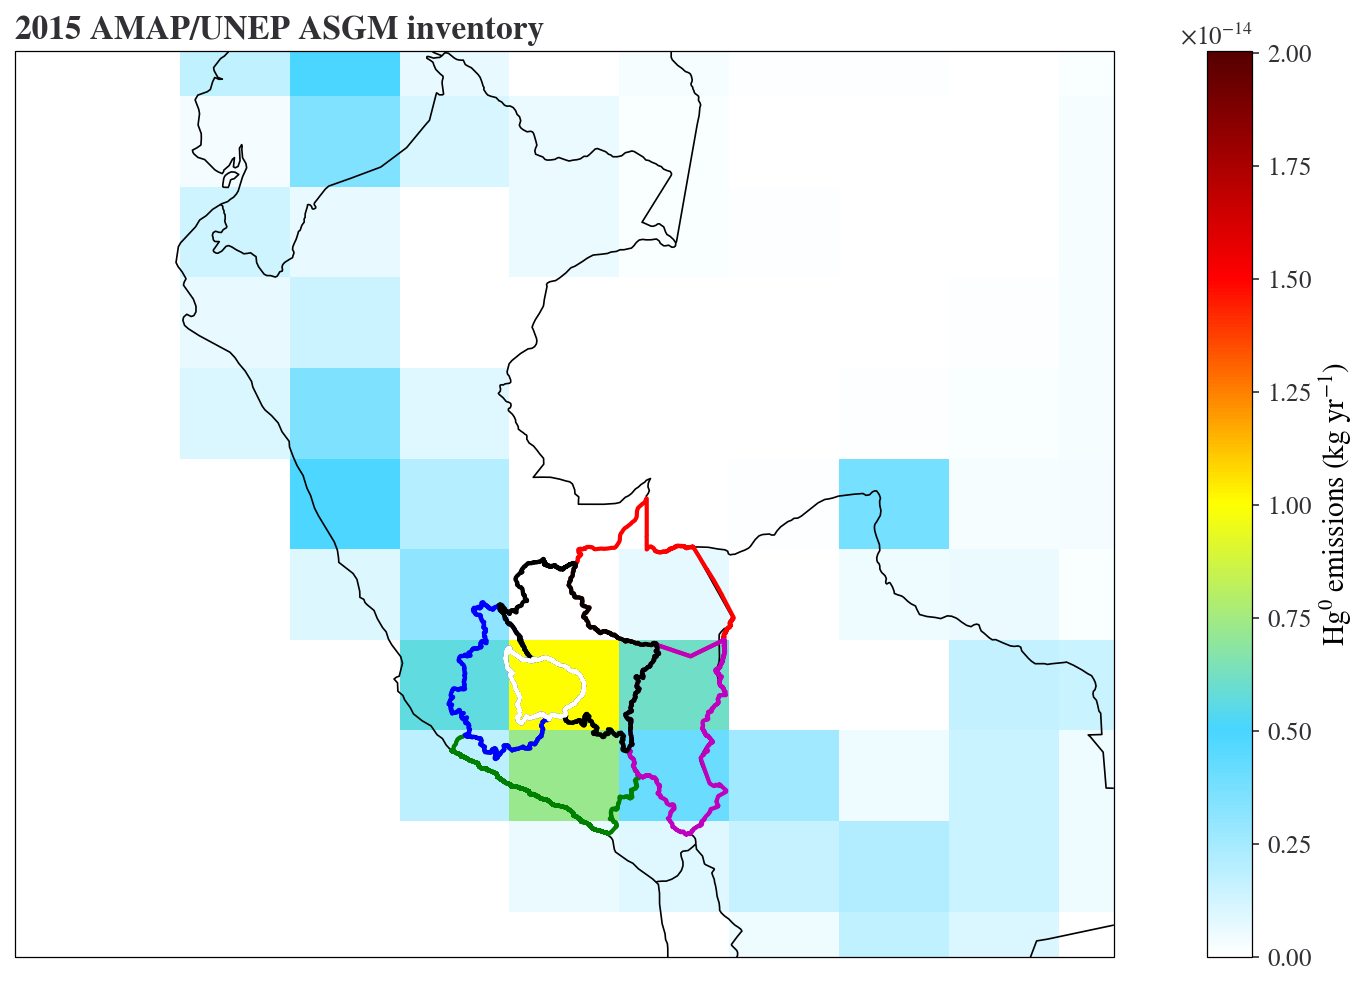

In [109]:
f, axes = plt.subplots(1, 1, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
#axes = axes.flatten()
                       

h = axes.pcolormesh(lon_GMA, lat_GMA, Hg0_emiss_ASGM_GMA,cmap=WhGrYlRd,rasterized = True)
Aqp.geometry.boundary.plot(ax=axes, edgecolor='g',linewidth = 2)
Mdd.geometry.boundary.plot(ax=axes, edgecolor='r',linewidth = 2)
Pun.geometry.boundary.plot(ax=axes, edgecolor='m',linewidth = 2)
Ayco.geometry.boundary.plot(ax=axes, edgecolor='b',linewidth = 2)
Cus.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Aprc.geometry.boundary.plot(ax=axes, edgecolor='w',linewidth = 2)
# axes.set_title('2015 AMAP/UNEP ASGM inventory', fontsize = 16, fontweight='bold'); #title
axes.set_xlim([-85, -60])
axes.set_ylim([-20, 0])
axes.add_feature(cf.BORDERS)
axes.coastlines()
cbar = f.colorbar(h,orientation='horizontal',ax=axes,shrink=0.4,pad=0.02)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)
name='GMA2018inventory2x25.pdf'    
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/Peru_Maps/'+name
f.savefig(savepath)

In [47]:
AGC_copy=Hg0_emiss_ASGM_GMA[:]

In [ ]:
AGC_emission_per_department = {}

In [48]:
AGC_copy

<xarray.DataArray (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5

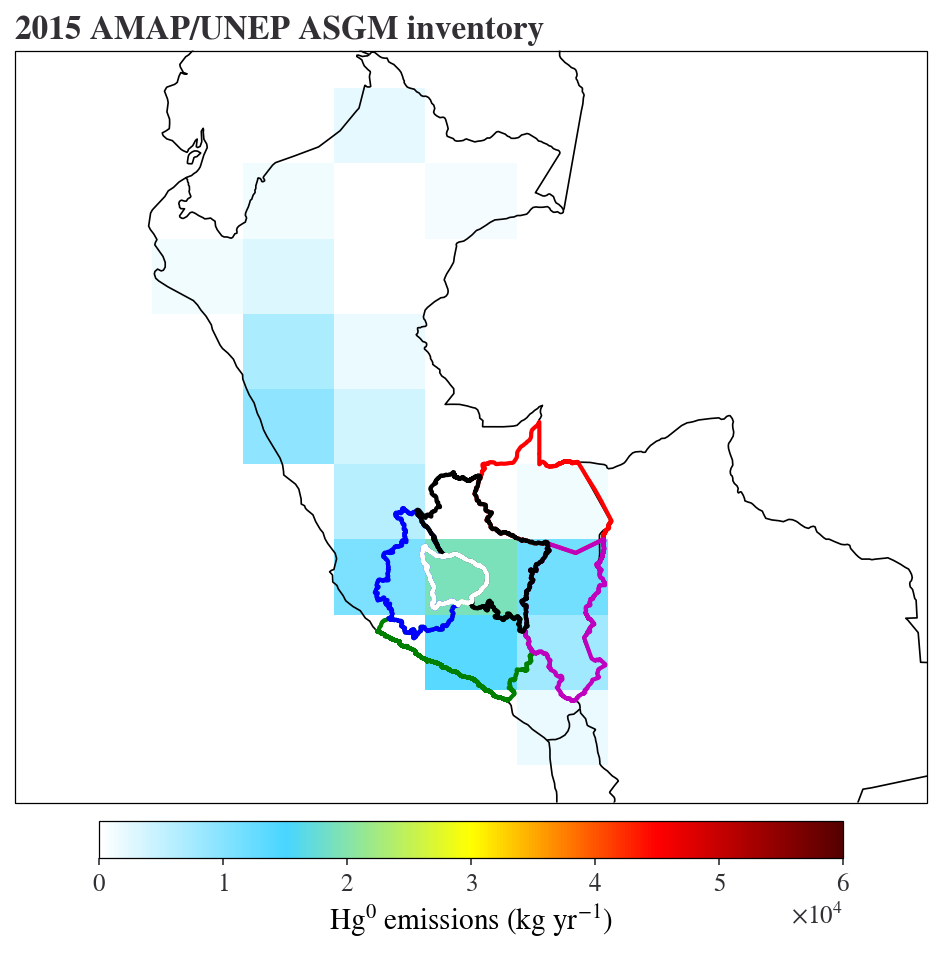

In [121]:
f, axes = plt.subplots(1, 1, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
#axes = axes.flatten()
                       

h = axes.pcolormesh(lon_GMA, lat_GMA,Hg0_emiss_ASGM_GMA.where(inPeru_GMA,0),cmap=WhGrYlRd,vmin=0,vmax=60000,rasterized = True)
Aqp.geometry.boundary.plot(ax=axes, edgecolor='g',linewidth = 2)
Mdd.geometry.boundary.plot(ax=axes, edgecolor='r',linewidth = 2)
Pun.geometry.boundary.plot(ax=axes, edgecolor='m',linewidth = 2)
Ayco.geometry.boundary.plot(ax=axes, edgecolor='b',linewidth = 2)
Cus.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Aprc.geometry.boundary.plot(ax=axes, edgecolor='w',linewidth = 2)
axes.set_title('2015 AMAP/UNEP ASGM Hg$^0$ Emissions Inventory', fontsize = 16, fontweight='bold'); #title
axes.set_xlim([-85, -60])
axes.set_ylim([-20, 0])
axes.add_feature(cf.BORDERS)
axes.coastlines()
cbar = f.colorbar(h,orientation='horizontal',ax=axes,shrink=0.4,pad=0.02)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)
name='GMA2018inventory2x25Peru.pdf'    
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/Peru_Maps/'+name
f.savefig(savepath)

In [52]:
#Create boolean array for lat-lon mesh
inPeru_GMA = np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)
inPeru_EDGAR = np.zeros((lat_EDGAR.size, lon_EDGAR.size), dtype=bool)
inPeru_STREETS = np.zeros((lat_STREETS.size, lon_STREETS.size), dtype=bool)

#only run over area where have points
min_lon = peru_sf.bounds.minx.values
max_lon = peru_sf.bounds.maxx.values
min_lat = peru_sf.bounds.miny.values
max_lat = peru_sf.bounds.maxy.values

In [20]:
emission_dict = {}

In [81]:
AGC_Peru_copy=AGC_copy.where(inPeru_GMA,0)*0+(1005.6/(len(AGC_copy.where(inPeru_GMA,0))-5))
AGC_Peru_copy.loc[dict(lon=-70, lat=-12)] = 54462.3
AGC_Peru_copy.loc[dict(lon=-72.5, lat=-16)] = 23860.8
AGC_Peru_copy.loc[dict(lon=-70, lat=-16.0)] = 9685.8
AGC_Peru_copy.loc[dict(lon=-70, lat=-14.0)] = 9685.8
AGC_Peru_copy.loc[dict(lon=-72.5, lat=-14.0)] = 10000

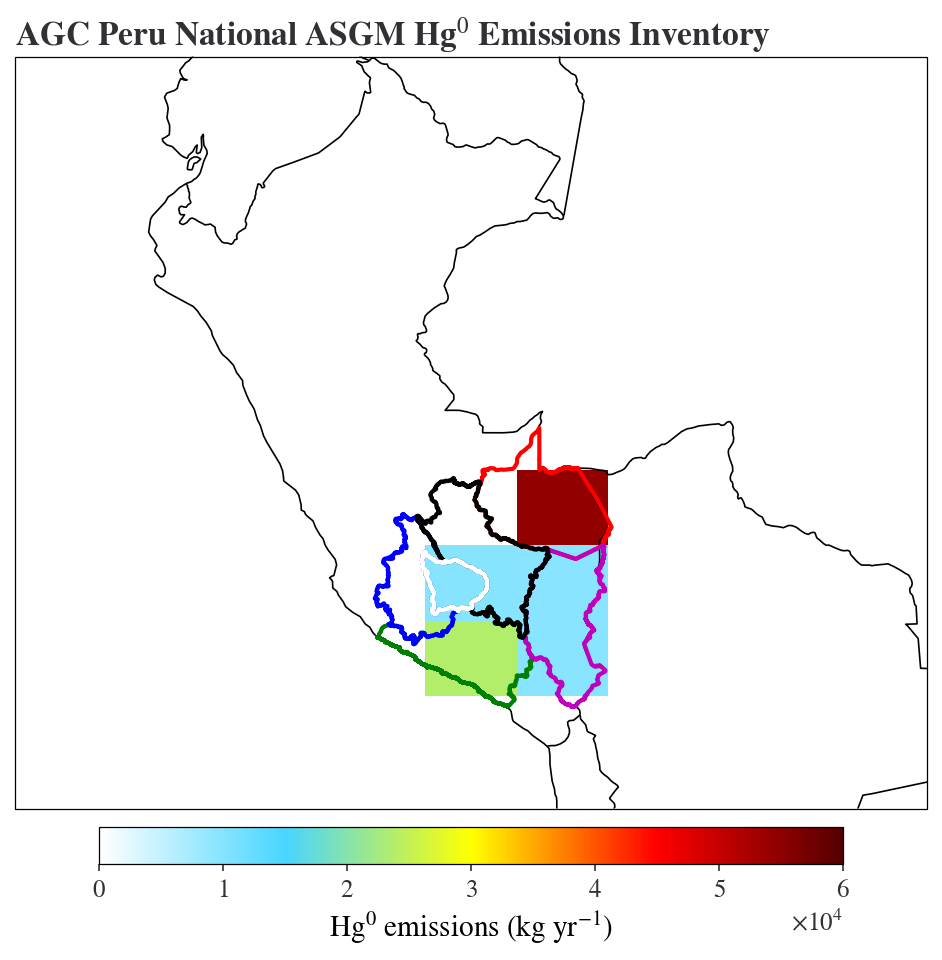

In [123]:

f, axes = plt.subplots(1, 1, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
#axes = axes.flatten()
colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))
terrain_map = colors.LinearSegmentedColormap.from_list(
    'terrain_map', all_colors)

# make the norm:  Note the center is offset so that the land has more
# dynamic range:
divnorm = colors.TwoSlopeNorm(vmin=0., vcenter=30000, vmax=60000)                      

h = axes.pcolormesh(lon_GMA, lat_GMA,AGC_Peru_copy,cmap=WhGrYlRd,rasterized = True, norm=divnorm, shading='auto')
Aqp.geometry.boundary.plot(ax=axes, edgecolor='g',linewidth = 2)
Mdd.geometry.boundary.plot(ax=axes, edgecolor='r',linewidth = 2)
Pun.geometry.boundary.plot(ax=axes, edgecolor='m',linewidth = 2)
Ayco.geometry.boundary.plot(ax=axes, edgecolor='b',linewidth = 2)
Cus.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 2)
Aprc.geometry.boundary.plot(ax=axes, edgecolor='w',linewidth = 2)
axes.set_title('AGC Peru National ASGM Hg$^0$ Emissions Inventory', fontsize = 16, fontweight='bold'); #title
axes.set_xlim([-85, -60])
axes.set_ylim([-20, 0])
axes.add_feature(cf.BORDERS)
axes.coastlines()
cbar = f.colorbar(h,orientation='horizontal',ax=axes,shrink=0.4,pad=0.02)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)
name='AGCinventory2x25Peru.pdf'    
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/Peru_Maps/'+name
f.savefig(savepath)
plt.show()

# Modify Rest of Peru Emissions 

In [53]:

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inPeru_GMA[ilat, ilon] = peru_sf.geometry.contains(Point(ln_adj,lt)).values


In [59]:
AGC_copy.where(inPeru_GMA,0)

<xarray.DataArray (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5

## Find coordinates for Ayachucho

In [74]:
inAyco_GMA = np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)

#only run over area where have points
min_lon =   Ayco.bounds.minx.values
max_lon =   Ayco.bounds.maxx.values
min_lat =   Ayco.bounds.miny.values
max_lat =   Ayco.bounds.maxy.values

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inAyco_GMA[ilat, ilon] = Mdd.geometry.contains(Point(ln_adj,lt)).values
        
ds_Ayco=HG0_emit_copy.where(inAyco_GMA,0)
df_Ayco_emit=ds_Ayco.to_dataframe()
df_Ayco_emit.loc[df_Ayco_emit['emi_hg_0']>0]

,,emi_hg_0
lat,lon,


In [73]:
HG0_emit_copy.where(inAyco_GMA,0)

<xarray.DataArray 'emi_hg_0' (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5
Attributes:
    units:    kg m-2 s-1

## Add AGC Emissions for Madre de Dios Department

In [56]:
#Create boolean array for lat-lon mesh
#mydict = {}
#def mass(x):
    #mydict={x:np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)}
inMdd_GMA = np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)

#only run over area where have points
min_lon =Mdd.bounds.minx.values
max_lon = Mdd.bounds.maxx.values
min_lat = Mdd.bounds.miny.values
max_lat = Mdd.bounds.maxy.values

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inMdd_GMA[ilat, ilon] = Mdd.geometry.contains(Point(ln_adj,lt)).values
        
sum_Mdd_GMA = Hg0_emiss_ASGM_GMA.where(inMdd_GMA).sum().values

print("Madre de Dios GMA emissions from ASGM:" + str(sum_Mdd_GMA) + " kg yr^-1") 

Madre de Dios GMA emissions from ASGM:1386.7788704774002 kg yr^-1


In [22]:
HG0_emit_copy.where(inMdd_GMA,0).sum().values

array(7.2704835e-16, dtype=float32)

In [23]:
ds_mdd_emit=HG0_emit_copy.where(inMdd_GMA,0)
df_mdd_emit=ds_mdd_emit.to_dataframe()
df_mdd_emit.loc[df_mdd_emit['emi_hg_0']>0]

,,emi_hg_0
lat,lon,
-12.0,-70.0,7.270483e-16


In [50]:
HG0_emit_copy.where(inMdd_GMA,0)

<xarray.DataArray 'emi_hg_0' (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5
Attributes:
    units:    kg m-2 s-1

In [24]:
#DA.loc[dict(axis_A="A_1", axis_B="B_1", axis_C="C_1")] = 1
HG0_emit_copy.loc[dict(lon=-70, lat=-12)] = 7.2704835e-16*1.5

In [25]:
ds_mdd_emit=HG0_emit_copy.where(inMdd_GMA,0)
df_mdd_emit=ds_mdd_emit.to_dataframe()
df_mdd_emit.loc[df_mdd_emit['emi_hg_0']>0]

,,emi_hg_0
lat,lon,
-12.0,-70.0,1.090572e-15


In [26]:
mdd_emit_1p5=HG0_emit_copy.copy(deep=True)

In [27]:
mdd_emit_1p5 = mdd_emit_1p5 * unit_conv * gbox_GMA

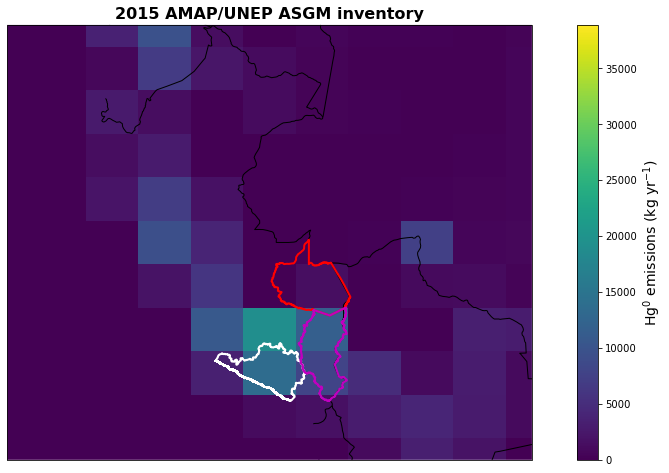

In [28]:
f, axes = plt.subplots(1, 1, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
#axes = axes.flatten()
                       
axes.coastlines()
h = axes.pcolormesh(lon_GMA, lat_GMA, Hg0_emiss_ASGM_GMA,rasterized = True)
Aqp.geometry.boundary.plot(ax=axes, edgecolor='w',linewidth = 2)
Mdd.geometry.boundary.plot(ax=axes, edgecolor='r',linewidth = 2)
Pun.geometry.boundary.plot(ax=axes, edgecolor='m',linewidth = 2)
axes.set_title('2015 AMAP/UNEP ASGM inventory', fontsize = 16, fontweight='bold'); #title
axes.set_xlim([-85, -60])
axes.set_ylim([-20, 0])
axes.add_feature(cf.BORDERS)
cbar = f.colorbar(h)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)

/tmp/ipykernel_1223691/1811102791.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


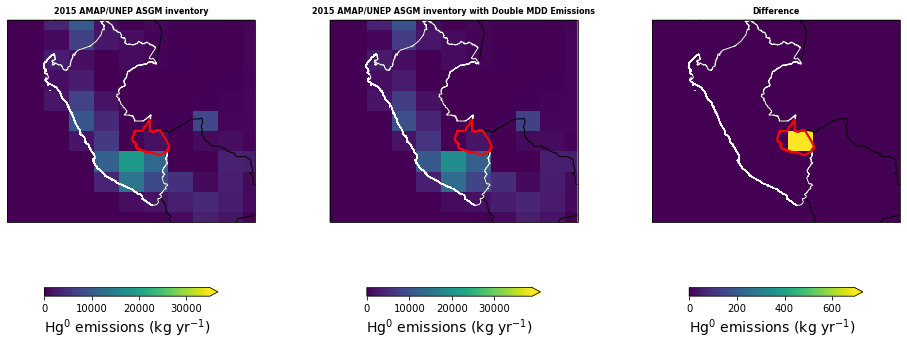

In [29]:
#2015 AMAP/UNEP
f, axes = plt.subplots(1, 3, figsize=[16,8],subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
#axes = axes.flatten()
                       
axes[0].coastlines()
h = axes[0].pcolormesh(lon_GMA, lat_GMA, Hg0_emiss_ASGM_GMA, vmin=0, vmax=35000, rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes[0], edgecolor='w',linewidth = 1)
Mdd.geometry.boundary.plot(ax=axes[0], edgecolor='r',linewidth = 2)
axes[0].set_title('2015 AMAP/UNEP ASGM inventory', fontsize = 8, fontweight='bold'); #title
axes[0].set_xlim([-85, -60])
axes[0].set_ylim([-20, 0])
axes[0].add_feature(cf.BORDERS)
cbar = f.colorbar(h, extend='max',orientation='horizontal',ax=axes[0], shrink=0.7)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)

axes[1].coastlines()
y=axes[1].pcolormesh(lon_GMA, lat_GMA, mdd_emit_1p5,rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes[1], edgecolor='w',linewidth = 1)
Mdd.geometry.boundary.plot(ax=axes[1], edgecolor='r',linewidth = 2)
axes[1].set_title('2015 AMAP/UNEP ASGM inventory with Double MDD Emissions', fontsize = 8, fontweight='bold'); #title
axes[1].set_xlim([-85, -60])
axes[1].set_ylim([-20, 0])
axes[1].add_feature(cf.BORDERS)
cbar = f.colorbar(y, extend='max',orientation='horizontal',ax=axes[1], shrink=0.7)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)

axes[2].coastlines()
w=axes[2].pcolormesh(lon_GMA, lat_GMA, mdd_emit_1p5-Hg0_emiss_ASGM_GMA,rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes[2], edgecolor='w',linewidth = 1)
Mdd.geometry.boundary.plot(ax=axes[2], edgecolor='r',linewidth = 2)
axes[2].set_title('Difference', fontsize = 8, fontweight='bold'); #title
axes[2].set_xlim([-85, -60])
axes[2].set_ylim([-20, 0])
axes[2].add_feature(cf.BORDERS)
cbar = f.colorbar(w, extend='max',orientation='horizontal',ax=axes[2], shrink=0.7)
cbar.set_label('Hg$^0$ emissions (kg yr$^{-1}$)', fontsize = 14)


f.tight_layout()

#plt.savefig('Figures/temp.pdf',bbox_inches = 'tight')

In [30]:
df_mdd_emit.loc[df_mdd_emit['emi_hg_0']>0]=df_mdd_emit.loc[df_mdd_emit['emi_hg_0']>0]*1.5

In [31]:
df_mdd_emit

emi_hg_0
lat   lon             
-89.5 -180.0       0.0
      -177.5       0.0
      -175.0       0.0
      -172.5       0.0
      -170.0       0.0
...                ...
 89.5  167.5       0.0
       170.0       0.0
       172.5       0.0
       175.0       0.0
       177.5       0.0

[13104 rows x 1 columns]

In [32]:
df_mdd_emit.loc[df_mdd_emit['emi_hg_0']>0]

,,emi_hg_0
lat,lon,
-12.0,-70.0,1.635859e-15


In [33]:
double=ds_mdd_emit+HG0_emit_copy

In [34]:
double


<xarray.DataArray 'emi_hg_0' (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5

In [35]:
double.to_dataset(name='emi_hg_0').to_netcdf('/net/fs03/d1/tzd/RAworkflow/emissions/MDD2GMA_emissions_ASGM_Hg0.2x25.2015.nc')

In [36]:
dataset=double.to_dataset(name='emi_hg_0')
dataset['emi_hg_0'].attrs['units']='kg m-2 s-1'
dataset

<xarray.Dataset>
Dimensions:   (lon: 144, lat: 91)
Coordinates:
  * lon       (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat       (lat) float64 -89.5 -88.0 -86.0 -84.0 ... 84.0 86.0 88.0 89.5
Data variables:
    emi_hg_0  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [37]:
dataset['emi_hg_0']

<xarray.DataArray 'emi_hg_0' (lat: 91, lon: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -89.5 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 89.5
Attributes:
    units:    kg m-2 s-1

In [38]:
dataset.to_netcdf(path='/net/fs03/d1/tzd/RAworkflow/emissions/MDD2GMA_emissions_ASGM_Hg0.2x25.2015.nc',mode='w')

In [39]:
path='/net/fs03/d1/tzd/RAworkflow/emissions/MDD2GMA_emissions_ASGM_Hg0.2x25.2015.nc'
xr.open_dataset(path)

<xarray.Dataset>
Dimensions:   (lon: 144, lat: 91)
Coordinates:
  * lon       (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat       (lat) float64 -89.5 -88.0 -86.0 -84.0 ... 84.0 86.0 88.0 89.5
Data variables:
    emi_hg_0  (lat, lon) float32 ...

## Calculate total Hg mass within the Arequipa province

In [40]:
#Create boolean array for lat-lon mesh
#mydict = {}
#def mass(x):
    #mydict={x:np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)}
inAqp_GMA = np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)

#only run over area where have points
min_lon =Aqp.bounds.minx.values
max_lon = Aqp.bounds.maxx.values
min_lat = Aqp.bounds.miny.values
max_lat = Aqp.bounds.maxy.values

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inAqp_GMA[ilat, ilon] =  Aqp.geometry.contains(Point(ln_adj,lt)).values
        
sum_Aqp_GMA = Hg0_emiss_ASGM_GMA.where(inAqp_GMA).sum().values

print("Arequipa GMA emissions from ASGM:" + str(sum_Aqp_GMA) + " kg yr^-1") 

Arequipa GMA emissions from ASGM:13633.991159353613 kg yr^-1


In [41]:
df_aqp_emit=HG0_emit_copy.where(inAqp_GMA,0).to_dataframe()
df_aqp_emit.loc[df_aqp_emit['emi_hg_0']>0]

,,emi_hg_0
lat,lon,
-16.0,-72.5,7.273586e-15


## Calculate total Hg mass within the Puno province

In [42]:
#Create boolean array for lat-lon mesh
#mydict = {}
#def mass(x):
    #mydict={x:np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)}
inPun_GMA = np.zeros((lat_GMA.size, lon_GMA.size), dtype=bool)

#only run over area where have points
min_lon =Pun.bounds.minx.values
max_lon = Pun.bounds.maxx.values
min_lat = Pun.bounds.miny.values
max_lat = Pun.bounds.maxy.values

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inPun_GMA[ilat, ilon] =  Pun.geometry.contains(Point(ln_adj,lt)).values
        
sum_Pun_GMA = Hg0_emiss_ASGM_GMA.where(inPun_GMA).sum().values

print("Puno GMA emissions from ASGM:" + str(sum_Pun_GMA) + " kg yr^-1") 

Puno GMA emissions from ASGM:19414.71105270607 kg yr^-1


In [43]:
df_pun_emit=HG0_emit_copy.where(inPun_GMA,0).to_dataframe()
df_pun_emit.loc[df_pun_emit['emi_hg_0']>0]

,,emi_hg_0
lat,lon,
-16.0,-70.0,4.133589e-15
-14.0,-70.0,6.165948e-15


In [44]:
emission_dict['mdd']=sum_Mdd_GMA
emission_dict['aqp']=sum_Aqp_GMA
emission_dict['pun']=sum_Pun_GMA
# emission_dict['cus']=sum_Cus_GMA
emission_dict['ayco']=sum_Ayco_GMA
emission_dict['aprc']=sum_Aprc_GMA
emission_dict

NameError: name 'sum_Ayco_GMA' is not defined

## calculate for GMA

In [ ]:

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inAqp_GMA[ilat, ilon] =  Aqp.geometry.contains(Point(ln_adj,lt)).values


In [ ]:

sum_Aqp_GMA = Hg0_emiss_ASGM_GMA.where(inAqp_GMA).sum().values

print("Arequipa GMA emissions from ASGM:" + str(sum_Aqp_GMA) + " kg yr^-1") 

Arequipa GMA emissions from ASGM:13633.991159353613 kg yr^-1


In [ ]:

for ilon, ln in enumerate(lon_GMA.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_GMA.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inPeru_GMA[ilat, ilon] = peru_sf.geometry.contains(Point(ln_adj,lt)).values


## calculate for EDGAR

In [51]:

for ilon, ln in enumerate(lon_EDGAR.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_EDGAR.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inPeru_EDGAR[ilat, ilon] = peru_sf.geometry.contains(Point(ln_adj,lt)).values


## calculate for STREETS

In [ ]:

for ilon, ln in enumerate(lon_STREETS.values):
    if ln > 180. :
        ln_adj = ln - 360.
    else :
        ln_adj = ln

    if ln_adj < min_lon or ln_adj > max_lon: #skip if far away from Peru
        continue
    
    for ilat, lt in enumerate(lat_STREETS.values ):
        if lt < min_lat or lt > max_lat: #skip if far away from Peru
            continue
        
        inPeru_STREETS[ilat, ilon] = peru_sf.geometry.contains(Point(ln_adj,lt)).values


## check if shape plotting worked

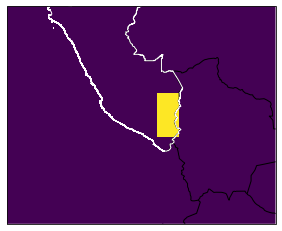

In [ ]:

f, axes = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()),
                       gridspec_kw=dict(hspace=0.3, wspace=0.3))
                       
axes.coastlines()
h = axes.pcolormesh(lon_STREETS, lat_STREETS, inPeru_STREETS, vmin=0, vmax=1, rasterized = True)
peru_sf.geometry.boundary.plot(ax=axes, edgecolor='w',linewidth = 1)
axes.set_xlim([-85, -60])
axes.set_ylim([-25, -5])
axes.add_feature(cf.BORDERS)

## Calculate sum in boolean area

In [ ]:

sum_Peru_ASGM_GMA = Hg0_emiss_ASGM_GMA.where(inPeru_GMA).sum().values
sum_Peru_ASGM_EDGAR = Hg0_emiss_ASGM_EDGAR.where(inPeru_EDGAR).sum().values
sum_Peru_STREETS = Hg0_emiss_STREETS.where(inPeru_STREETS).sum().values
print("Peru GMA emissions from ASGM:" + str(sum_Peru_ASGM_GMA) + " kg yr^-1") 
print("Peru EDGAR emissions from ASGM:" + str(sum_Peru_ASGM_EDGAR) + " kg yr^-1") 
print("Peru STREETS emissions (total):" + str(sum_Peru_STREETS) + " kg yr^-1") 

Peru GMA emissions from ASGM:19414.71105270607 kg yr^-1
Peru EDGAR emissions from ASGM:5046.828130666258 kg yr^-1
Peru STREETS emissions (total):2314.80172736344 kg yr^-1
